**House Prices - Advanced Regression Techniques**

*Author: Muhammad Daud Sheikh*

*Due Date: 12-06-2021*

The following models are to be trained for housing price prediction:

- Gradient Boosting Regressor
- Decision Tree Regressor
- Random Forest Regressor
- Ridge Regressor

These models along with GridSearchCV class will be used to determine the best model among these to train on housing data

**Machine Learning Work Flow**

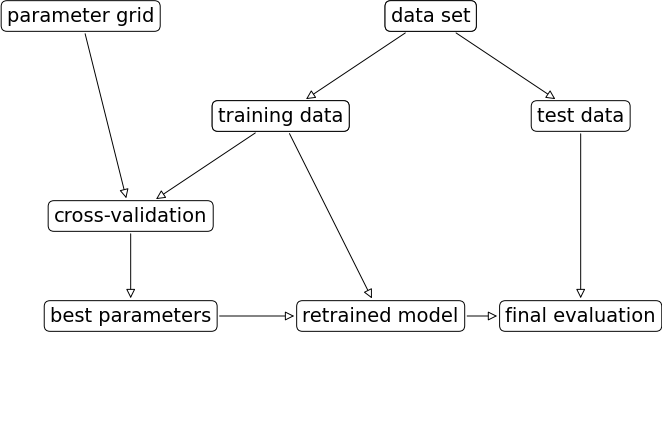

In [1]:
import mglearn
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
mglearn.plots.plot_grid_search_overview()

**Steps For Machine Learning**

Step 1 - *Import data*

Step 3 - *Preprocessing Pipeline*
- Use column tranformer to apply different preprocessing and feature for numerical and categorical features

Step 4 - *Pipeline*
- Preprocessing Pipeline
- Models - Linear Regression, Ridge Regression, Gradient Boosting Regressor, Decision Tree

Step 5 - *GridSearchCV*
- Parameter grid
- Pipeline object


**Step 1 - Import Data**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sb

In [3]:
data_train = pd.read_csv("train.csv").fillna(method='ffill')
data_test = pd.read_csv("test.csv").fillna(method='ffill')

In [5]:
data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


**Step 2 - Train test split data set**

In [6]:
from sklearn.model_selection import train_test_split

X = data_train[['Id', 'LotFrontage', 'LotArea', 'BldgType', 'HouseStyle', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 
                'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'TotRmsAbvGrd', 'YrSold', 'Neighborhood', 'GarageType', 'GarageArea', 'WoodDeckSF', 'LotShape']]

y = data_train.iloc[: , -1]

print(X.shape)
print(y.shape)

(1460, 18)
(1460,)


In [7]:
from sklearn.model_selection import train_test_split

X_val = data_test[['Id', 'LotFrontage', 'LotArea', 'BldgType', 'HouseStyle', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 
                'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'TotRmsAbvGrd', 'YrSold', 'Neighborhood', 'GarageType', 'GarageArea', 'WoodDeckSF', 'LotShape']]

y_val = data_test.iloc[: , -1]

print(X.shape)
print(y.shape)

(1460, 18)
(1460,)


**Data Exploration**

<AxesSubplot:title={'center':'Pearson Correlation of House Price Features'}>

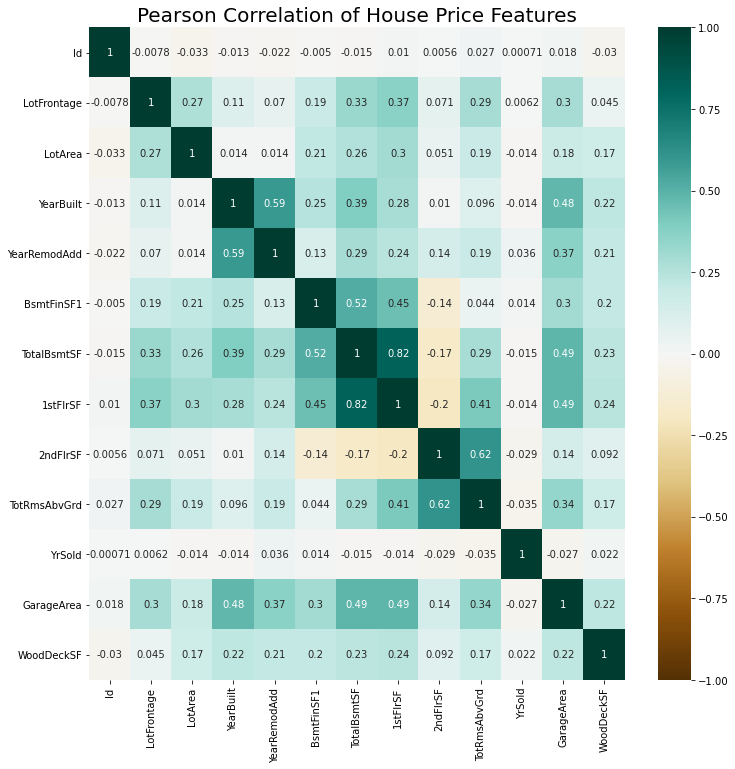

In [8]:
#figures for feature visualization

fig, ax = plt.subplots(figsize=(12, 12))


ax.set_title("Pearson Correlation of House Price Features", fontsize = 20)

sns.heatmap(X.corr(), vmin = -1, vmax = 1, annot=True, cmap='BrBG')

**Preprocessing Column Transformer**

In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

preprocessor = ColumnTransformer([
    ("scaling", StandardScaler(), ['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 
                                    'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'TotRmsAbvGrd', 'TotRmsAbvGrd', 'GarageArea', 'WoodDeckSF']),
     ("onehot", OneHotEncoder(sparse=False, handle_unknown = 'ignore'), ['BldgType', 'HouseStyle', 'Neighborhood', 'GarageType', 'LotShape'])
    ])
     
    #print("model score: %.3f" % pipeline.score(X_test, y_test))

**Gridsearch & Pipeline Function**

In [10]:
def gridSearchCV_pipeline(X, y, preprocessor, model, parameters):
    
    from sklearn.model_selection import GridSearchCV
    from sklearn.pipeline import Pipeline
    
    pipeline = Pipeline(steps=[("preprocessor", preprocessor), ("model", model)])
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
    
    gridsearch = GridSearchCV(pipeline, parameters, cv = 5)
    gridsearch.fit(X_train, y_train)
    
    training_scores = gridsearch.cv_results_['mean_test_score']
    
    print("Mean CV scores for training dataset for each parameter value: \n", training_scores)
    print(gridsearch.best_params_)
    
    test_score = gridsearch.score(X_test, y_test)
    print("\n\nValidation score for the test dataset for the best parameter value: \n", test_score)
    
    
    #test_scores = gridsearch.predict()
    

**Gradient Boosting Regressor GridSearchCV Results**

In [11]:
from sklearn.ensemble import GradientBoostingRegressor
parameters = {'model__n_estimators':[200,300,400]}
gb = GradientBoostingRegressor(random_state=0, max_depth = 3, n_estimators = 200, min_samples_split = 3, 
                               min_samples_leaf = 1, min_weight_fraction_leaf = 0 , max_features = 'auto')
gridSearchCV_pipeline(X, y, preprocessor, gb, parameters)

Mean CV scores for training dataset for each parameter value: 
 [0.8130581  0.81078327 0.81022645]
{'model__n_estimators': 200}


Validation score for the test dataset for the best parameter value: 
 0.8787301683625633


**Decision Tree Regressor GridSearchCV Results**

In [239]:
from sklearn.tree import DecisionTreeRegressor
    
parameters = {'model__max_depth':[5,6,7,8,9,10,11,12,13]}
dtr = DecisionTreeRegressor(random_state=0)
gridSearchCV_pipeline(X, y, preprocessor, dtr, parameters)

Mean CV scores for training dataset for each parameter value: 
 [0.6233732  0.63715288 0.62245179 0.66286828 0.63541357 0.61640905
 0.61305658 0.61209371 0.6239063 ]
{'model__max_depth': 8}


Validation score for the test dataset for the best parameter value: 
 0.6984794697319328


**Random Forest Regressor GridSearchCV Results**

In [241]:
from sklearn.ensemble import RandomForestRegressor

parameters = {'model__max_depth': [10,11,12,13,14,15,16,17,18,19,20]}
rfc = RandomForestRegressor(max_depth=2, random_state=0)
rfc.get_params().keys()
gridSearchCV_pipeline(X, y, preprocessor, rfc, parameters)

Mean CV scores for training dataset for each parameter value: 
 [0.80845801 0.81003175 0.81033803 0.81068866 0.81191135 0.80880853
 0.81253335 0.80931298 0.80884664 0.80983229 0.80984773]
{'model__max_depth': 16}


Validation score for the test dataset for the best parameter value: 
 0.8158976689491361


**Ridge Regressor GridSearchCV Results**

In [242]:
from sklearn.linear_model import Ridge
parameters = {'model__alpha':[1, 2, 3, 4, 5, 6, 7, 8, 9]}
ridge = Ridge(alpha = 1.0)
gridSearchCV_pipeline(X, y, preprocessor, ridge, parameters)

Mean CV scores for training dataset for each parameter value: 
 [0.82294571 0.82388027 0.8243616  0.82457243 0.82460839 0.82452512
 0.8243575  0.82412863 0.82385448]
{'model__alpha': 5}


Validation score for the test dataset for the best parameter value: 
 0.6970698641606856
